In [ ]:
import os
os.chdir('..')

In [1]:
from copy import deepcopy
import numpy as np
import torch as tr
from tqdm.auto import tqdm
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from fair_graphs.datasets.scalers import MinMaxScaler
from fair_graphs.datasets.graph_datasets import (GermanData, BailData, CreditData, PokecData,
                                                 FacebookData, GooglePlusData)
from fair_graphs.launchers.launch_fap import optim_fairAutoEncoder

In [6]:
lambdas = [1, 1e-1, 1e-2, 1e-3]

In [ ]:
def print_scatter(mses_dp, fair_losses_dp,
                  mses_eo0, fair_losses_eo0,
                  mses_eo1, fair_losses_eo1):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout = True)

    for ic, color in enumerate(['blue', 'orange', 'green', 'red']):
        axs[0].scatter(mses_dp[ic], fair_losses_dp[ic], c=color, s=200, label='lambda =' + str(lambdas[ic]),
                alpha=0.9, edgecolors='none')
        axs[1].scatter(mses_eo0[ic], fair_losses_eo0[ic], c=color, s=200, label='lambda =' + str(lambdas[ic]),
                alpha=0.9, edgecolors='none')
        axs[2].scatter(mses_eo1[ic], fair_losses_eo1[ic], c=color, s=200, label='lambda =' + str(lambdas[ic]),
                alpha=0.9, edgecolors='none')

    axs[0].set(xlabel='MSE', ylabel='DP')
    axs[1].set(xlabel='MSE', ylabel='EO-')
    axs[2].set(xlabel='MSE', ylabel='EO+')
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    plt.show()

## German

In [5]:
data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

(torch.Size([1000, 27]),
 torch.Size([1000]),
 torch.Size([1000]),
 <1000x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3662 stored elements in Compressed Sparse Row format>)

In [4]:
num_splits = 50
num_samples, num_feat = data.samples.shape
db = 'german'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')

In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

100%|██████████| 50/50 [13:54<00:00, 16.69s/it]


In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

100%|██████████| 50/50 [12:15<00:00, 14.71s/it]


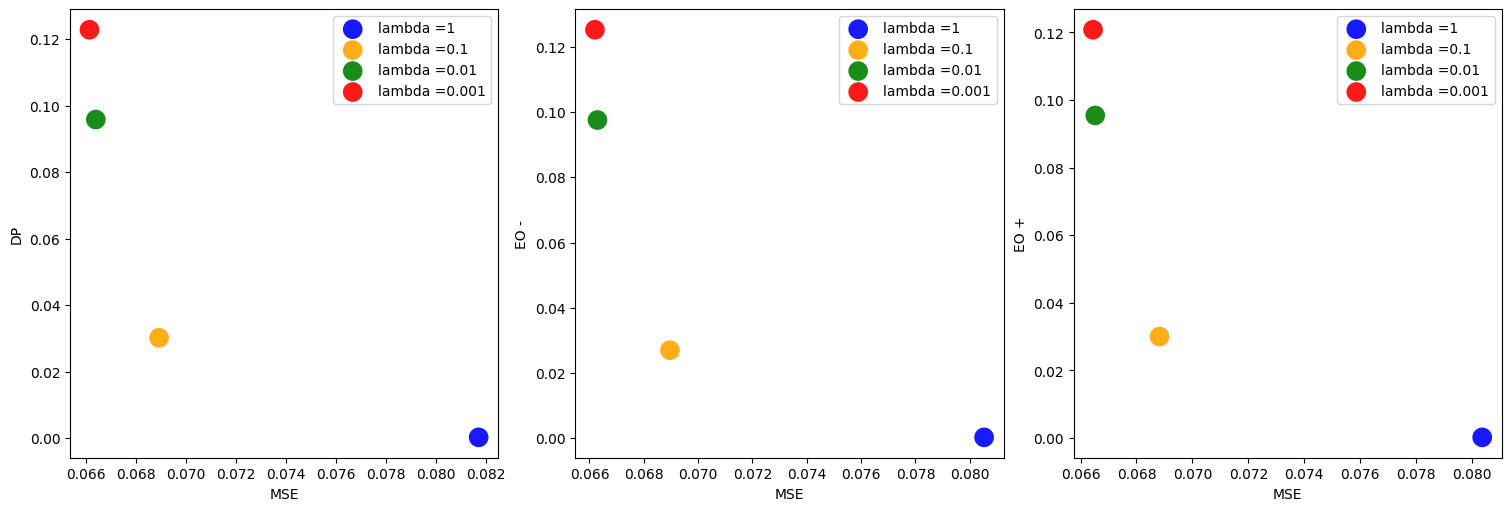

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)

## Bail

In [ ]:
data = BailData(sensitive_attribute = 'WHITE',
                  target_attribute = 'RECID',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

(torch.Size([18876, 18]),
 torch.Size([18876]),
 torch.Size([18876]),
 tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]], dtype=torch.float64))

In [ ]:
num_samples, num_feat = data.samples.shape
db = 'Bail'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')

100%|██████████| 50/50 [3:37:19<00:00, 260.79s/it]  


In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

100%|██████████| 50/50 [3:39:20<00:00, 263.20s/it]  


In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

100%|██████████| 50/50 [3:35:57<00:00, 259.16s/it]  


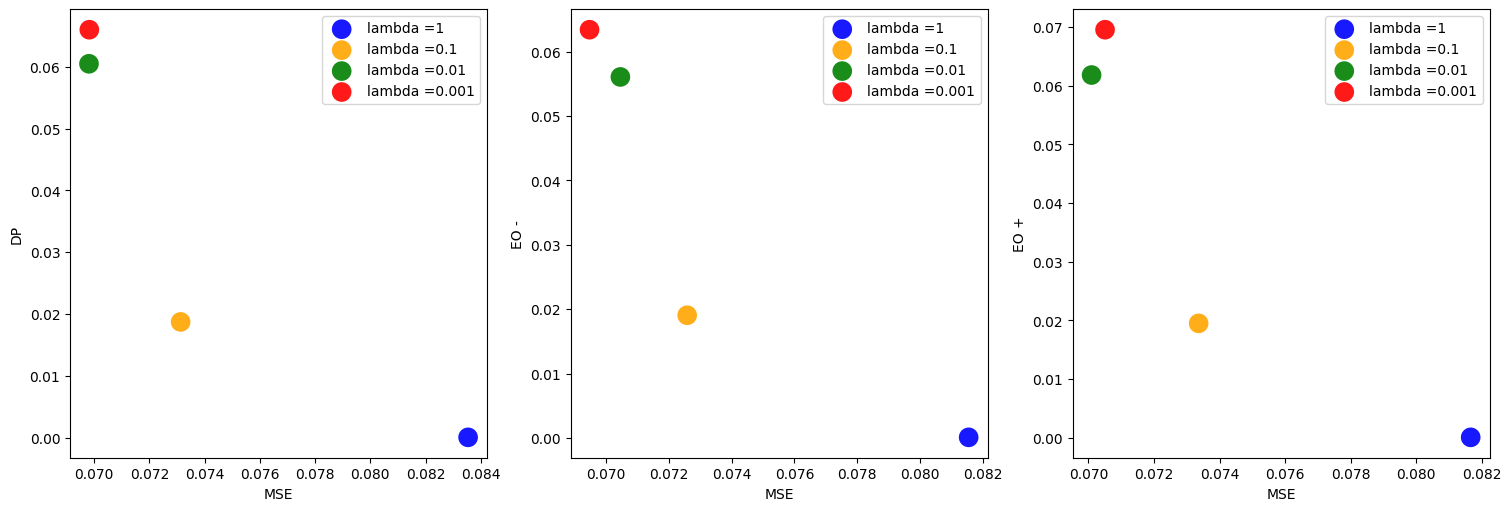

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)

## Credit

In [ ]:
data = CreditData(sensitive_attribute = 'Age',
                  target_attribute = 'NoDefaultNextMonth',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

(torch.Size([30000, 13]),
 torch.Size([30000]),
 torch.Size([30000]),
 tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]], dtype=torch.float64))

In [ ]:
num_samples, num_feat = data.samples.shape
db = 'Credit'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')

100%|██████████| 50/50 [1:58:47<00:00, 142.55s/it]


In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

100%|██████████| 50/50 [2:25:57<00:00, 175.16s/it]  


In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

100%|██████████| 50/50 [1:48:42<00:00, 130.45s/it]


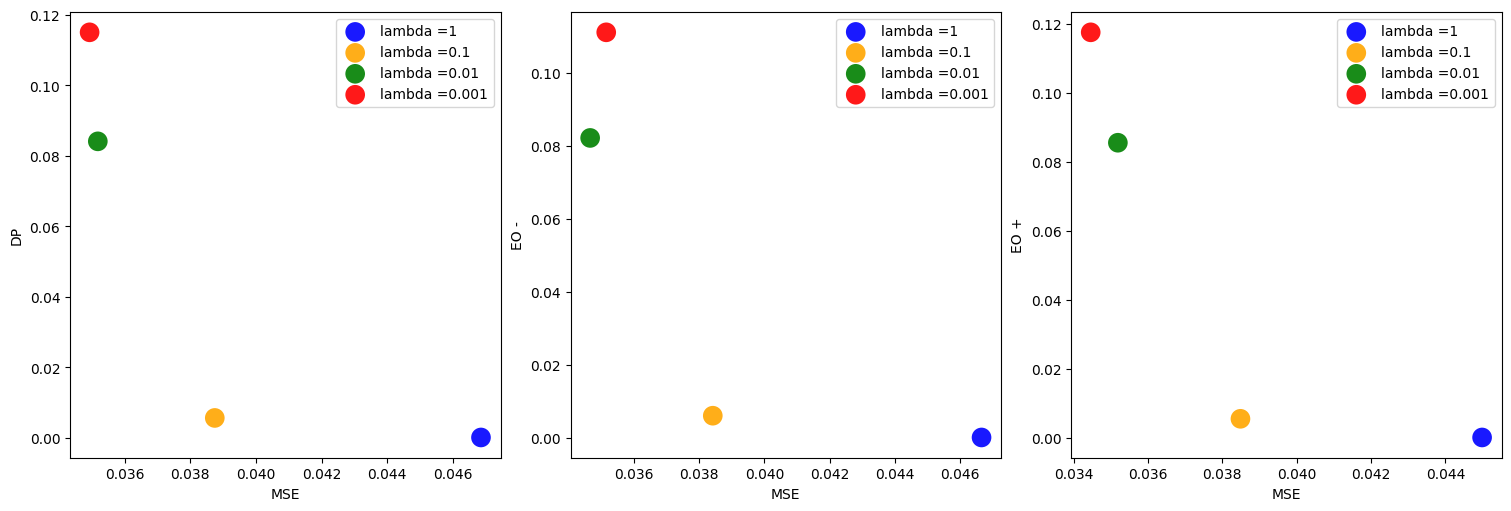

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)

## Pokec 

In [6]:
data = PokecData(sensitive_attribute='region', 
                 target_attribute='marital_status_indicator',
                 include_sensitive=True, 
                 num_samples=0, 
                 pre_scale_features=False, 
                 region_suffix = 'z')

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

(torch.Size([67796, 276]),
 torch.Size([67796]),
 torch.Size([67796]),
 <67796x67796 sparse matrix of type '<class 'numpy.float64'>'
 	with 1303712 stored elements in Compressed Sparse Row format>)

In [11]:
num_splits = 50
num_samples, num_feat = data.samples.shape

train_percentage = .4
trn_device = tr.device("cuda" if tr.cuda.is_available() else "cpu")

lambdas = [1, 1e-1, 1e-2, 1e-3]
db = 'Pokec'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')


  0%|                                                                                                                           | 0/50 [00:00<?, ?it/s]

In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)

## Facebook

In [8]:
data = FacebookData(sensitive_attribute='gender', 
                    target_attribute='egocircle',
                    include_sensitive=True, 
                    num_samples=0)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

(torch.Size([1045, 575]),
 torch.Size([1045]),
 torch.Size([1045]),
 <1045x1045 sparse matrix of type '<class 'numpy.float32'>'
 	with 53498 stored elements in Compressed Sparse Row format>)

In [9]:
num_splits = 50
num_samples, num_feat = data.samples.shape
db = 'facebook'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')

In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)

## Google Plus

In [ ]:
data = GooglePlusData(sensitive_attribute='gender', 
                      target_attribute='egocircle',
                      include_sensitive=True, 
                      num_samples=0)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx

In [ ]:
num_splits = 50
num_samples, num_feat = data.samples.shape
db = 'gplus'

In [ ]:
mses_dp, fair_losses_dp = optim_fairAutoEncoder(num_splits = num_splits,
                                                num_samples = num_samples,
                                                num_feat = num_feat,
                                                data = data,
                                                db_name = db,
                                                lambdas = lambdas,
                                                metric = 'dp')

In [ ]:
mses_eo0, fair_losses_eo0 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 0)

In [ ]:
mses_eo1, fair_losses_eo1 = optim_fairAutoEncoder(num_splits = num_splits,
                                                  num_samples = num_samples,
                                                  num_feat = num_feat,
                                                  data = data,
                                                  db_name = db,
                                                  lambdas = lambdas,
                                                  metric = 'eo',
                                                  pos = 1)

In [ ]:
print_scatter(mses_dp, fair_losses_dp,
              mses_eo0, fair_losses_eo0,
              mses_eo1, fair_losses_eo1)